In [1]:
import rhopca
from rhopca.core import rhoPCA

import anndata as ad
import scanpy as sc

# Preprocess data and fit

In [2]:
adata = ad.read_h5ad('adata_subset.h5ad')

In [3]:
# normalize
sc.pp.normalize_total(adata,target_sum=10000)
sc.pp.log1p(adata)

# select highly variable genes in the target -- select fewer than samples so covariance matrix is positive definite! 
adata_target = adata[adata.obs.Sex=='Female']
sc.pp.highly_variable_genes(adata_target,n_top_genes = 1000  )

adata = adata[:,adata_target.var.highly_variable ]

/home/mcarilli/miniconda3/envs/scenv/lib/python3.13/site-packages/scanpy/preprocessing/_highly_variable_genes.py:705: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}


In [4]:
# instatiate model with column to constrast and fields to serve as target and background
mdl = rhoPCA(adata,contrast_column='Sex',target='Female',background='Male')

# fit 
mdl.fit() 

# Visualize results

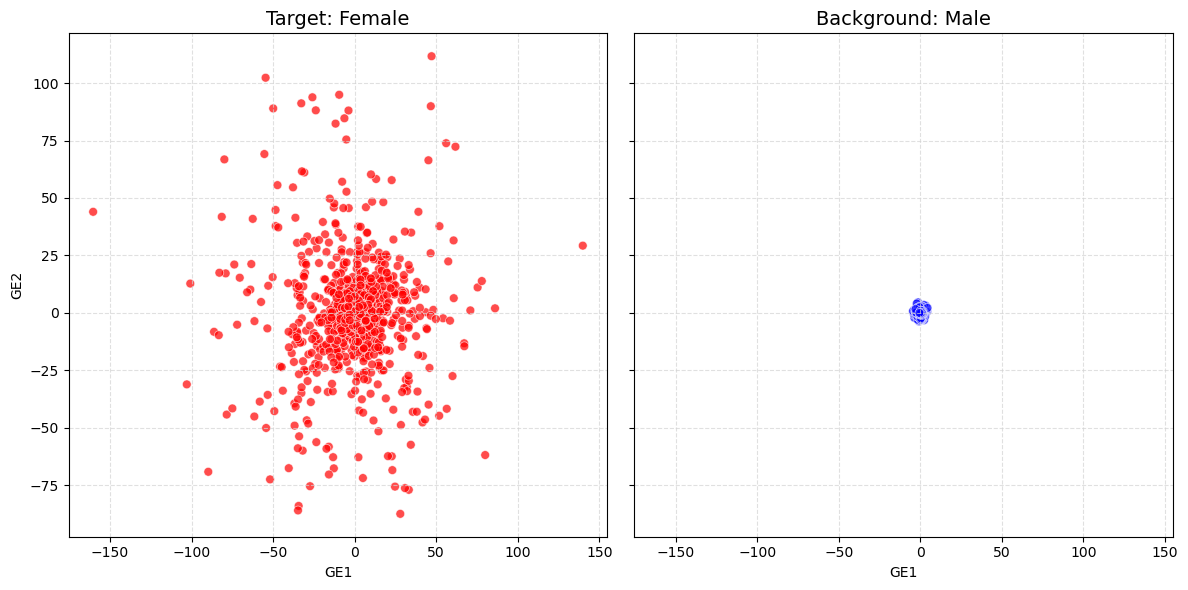

In [5]:
# visualize projections 
mdl.plot_scatter()

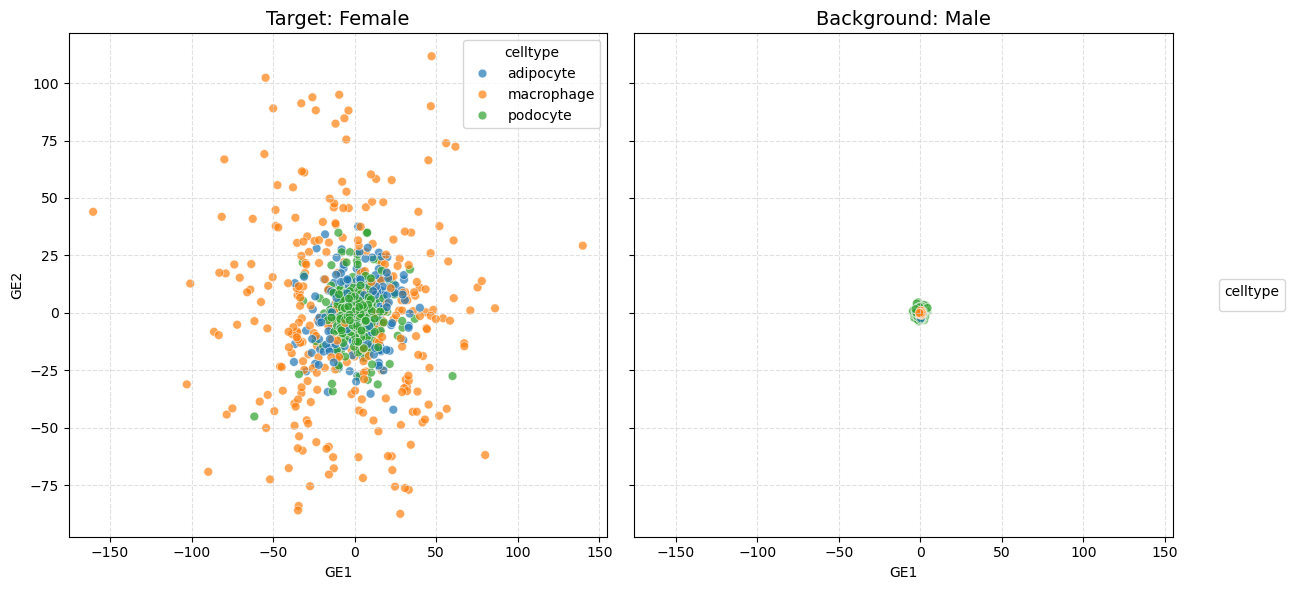

In [6]:
# visualize projections, colored by cell type
mdl.plot_scatter(color_by='celltype')

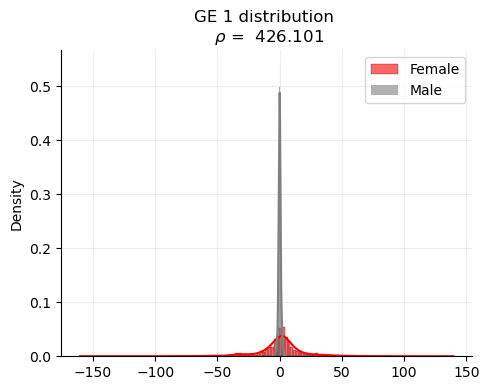

In [7]:
# plot histogram of target and background projections on different GEs: this also returns rho
mdl.plot_hist(GE=1,color='red')

# Quantitative analysis

In [8]:
# get top genes along specified GE
mdl.get_top_genes(GE=1)

['Prkar2b', 'Otulinl', 'Ly86', 'Thrb', 'Fasn']

In [13]:
# get rho (target variance / background variance) for each GE
rho_all = mdl.get_rhos()

In [14]:
rho_all

,GE 1,GE 2,GE 3,GE 4,GE 5,GE 6,GE 7,GE 8,GE 9,GE 10,...,GE 991,GE 992,GE 993,GE 994,GE 995,GE 996,GE 997,GE 998,GE 999,GE 1000
All,426.087174,405.189079,361.178728,351.953077,340.595814,332.631214,319.864914,303.135529,265.412646,261.356327,...,0.001235,0.001204,0.001147,0.001125,0.001024,0.000985,0.000906,0.000843,0.000829,0.000687


In [15]:
# get rho (target variance / background variance) for each GE grouped by cell type
rho_ct = mdl.get_rhos(group_by='celltype')

In [16]:
rho_ct

,GE 1,GE 2,GE 3,GE 4,GE 5,GE 6,GE 7,GE 8,GE 9,GE 10,...,GE 991,GE 992,GE 993,GE 994,GE 995,GE 996,GE 997,GE 998,GE 999,GE 1000
macrophage,5628.524271,5610.628357,3676.460153,4036.056010,3756.686081,3422.441371,3613.618758,3168.056705,2810.052024,2556.863357,...,0.000051,0.000070,0.000057,0.000051,0.000053,0.000050,0.000052,0.000048,0.000038,0.000032
adipocyte,322.332695,269.318771,229.761720,223.060331,117.646070,248.556722,239.659078,275.884446,148.111469,151.958361,...,0.003485,0.003027,0.003983,0.002731,0.003262,0.006270,0.003753,0.003065,0.002363,0.003479
podocyte,30.562164,30.273736,26.985767,26.615811,23.054546,22.691930,23.460306,27.330154,20.776259,28.138320,...,0.048851,0.043370,0.055051,0.041488,0.031053,0.051096,0.034223,0.037183,0.030154,0.030177
